## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 2: Cars 4 U</span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
Explor the data, and find A regression relationship between price for used cars and other columns that describe the value o the car.
    
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Overview</li>
    <li>Univariate Data Analysis</li>
    <li>Multivariate Data Analysis</li>
    <li>Feature Engineer and Outlier Treatment</li>
    <li>Model building and Evaluation</li>
    <li>Recommendations</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


warnings.filterwarnings('ignore')                          # Ignore/Do not display warnings

main_data = pd.read_csv('used_cars_data.csv', index_col=0)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

sns.set(color_codes=False)                                # Displays charts with background colors
%matplotlib inline

default_color_palette = ["#03A9F4", "#FF6F00", "#0288D1", "#D50000", "#7C4DFF"]
stats_colors = {'Mean':'#D50000', 'Mode':'#FF3D00', 'Median':'#2962FF'}

In [2]:
print(f"Rows : {main_data.shape[0]} x Columns : {main_data.shape[1]}")

Rows : 7253 x Columns : 13


In [3]:
def info(dataFrame):
    nulls_series             = dataFrame.isna().sum()         # Get a series counting number of empty values for each column
    nonnulls_series          = dataFrame.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
    nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
    column_datatypes         = dataFrame.dtypes               # Get a series containing data types for each column 

    nulls_count_df = pd.concat(
        [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
        axis=1,
        keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
        sort=True)
    cm = sns.light_palette("red", as_cmap=True)
    display(nulls_count_df.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['Nulls %']]).format(formatter={('Nulls %'): "{:.2f}%"}))    

In [4]:
info(main_data)

In [5]:
np.random.seed(1)
main_data.sample(n=10)

Name    Location  Year  \
S.No.                                                                
2397              Ford EcoSport 1.5 Petrol Trend     Kolkata  2016   
3777                      Maruti Wagon R VXI 1.2       Kochi  2015   
4425                      Ford Endeavour 4x2 XLT   Hyderabad  2007   
3661   Mercedes-Benz E-Class E250 CDI Avantgrade  Coimbatore  2016   
4514        Hyundai Xcent 1.2 Kappa AT SX Option       Kochi  2016   
599               Toyota Innova Crysta 2.8 ZX AT  Coimbatore  2019   
186    Mercedes-Benz E-Class E250 CDI Avantgrade   Bangalore  2014   
305       Audi A6 2011-2015 2.0 TDI Premium Plus       Kochi  2014   
4582                       Hyundai i20 1.2 Magna     Kolkata  2011   
5434            Honda WR-V Edge Edition i-VTEC S       Kochi  2019   

       Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
S.No.                                                                    
2397               21460    Petrol       Manual      First   17.0 kmpl   
3777               49818    Petrol       Manual      First   21.5 kmpl   
4425              130000    Diesel       Manual      First   13.1 kmpl   
3661               39753    Diesel    Automatic      First   13.0 kmpl   
4514               45560    Petrol    Automatic      First   16.9 kmpl   
599                40674    Diesel    Automatic      First  11.36 kmpl   
186                37382    Diesel    Automatic      First   13.0 kmpl   
305                61726    Diesel    Automatic      First  17.68 kmpl   
4582               36000    Petrol       Manual      First   18.5 kmpl   
5434               13913    Petrol       Manual      First   17.5 kmpl   

        Engine       Power  Seats   New_Price  Price  
S.No.                                                 
2397   1497 CC  121.36 bhp    5.0   9.47 Lakh   6.00  
3777   1197 CC   81.80 bhp    5.0   5.44 Lakh   4.11  
4425   2499 CC     141 bhp    7.0         NaN   6.00  
3661   2143 CC   201.1 bhp    5.0         NaN  35.28  
4514   1197 CC      82 bhp    5.0         NaN   6.34  
599    2755 CC   171.5 bhp    7.0  28.05 Lakh  24.82  
186    2143 CC   201.1 bhp    5.0         NaN  32.00  
305    1968 CC  174.33 bhp    5.0         NaN  20.77  
4582   1197 CC      80 bhp    5.0         NaN   2.50  
5434   1199 CC    88.7 bhp    5.0   9.36 Lakh   8.20

In [6]:
print(f"Owner Types\t: {main_data.Owner_Type.unique()}\n")
print(f"Transmissions\t: {main_data.Transmission.unique()}\n")
print(f"Fuel Types\t: {main_data.Fuel_Type.unique()}\n")
print(f"Locations\t: {main_data.Location.unique()}\n")
print(f"Years\t: {main_data.Year.unique()}\n")

Owner Types	: ['First' 'Second' 'Fourth & Above' 'Third']

Transmissions	: ['Manual' 'Automatic']

Fuel Types	: ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

Locations	: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

Years	: [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]



In [7]:
def get_units(column_series):
    column_series = column_series.astype("string")
    units = []
    for item in column_series:
        if isinstance(item, str):
            current_unit = item.split(" ")[1]
            if current_unit not in units:
                units.append(current_unit)
    print(f"{column_series.name} Units\t: {units}")
    return pd.Series(units)

continuous_col_names = ["Mileage", "Engine", "Power", "New_Price"]

for col in continuous_col_names:
    get_units(main_data[col])

Mileage Units	: ['km/kg', 'kmpl']
Engine Units	: ['CC']
Power Units	: ['bhp']
New_Price Units	: ['Lakh', 'Cr']


In [8]:
def to_float(col_value):
    if isinstance(col_value, str):
        return float(col_value.split(" ")[0].strip())
    else:
        return np.nan
    
for col in continuous_col_names:
    main_data[col] = main_data[col].astype("string").apply(to_float)

info(main_data)

In [9]:
def crore_to_lakh(val):
    if val == val:
        return float(val) * 100
        

main_data["New_Price"] = main_data["New_Price"].apply(crore_to_lakh)
main_data.sample(n=10)

Name   Location  Year  Kilometers_Driven  \
S.No.                                                                         
2245             Maruti Wagon R VXI 1.2     Mumbai  2015              55000   
6407            Maruti Swift LXI Option      Kochi  2017              62889   
1226    Toyota Corolla Altis 1.8 VL CVT      Delhi  2017              21000   
533                 Honda City 1.5 V AT     Mumbai  2010              69000   
6330               Hyundai i20 Asta 1.2    Kolkata  2015              33000   
5931                  Maruti Ertiga VXI     Mumbai  2012              52500   
2784             Nissan Micra Diesel XV  Hyderabad  2011              86732   
5180   Skoda Superb Elegance 1.8 TSI AT  Bangalore  2009              75000   
2722   Volkswagen Ameo 1.5 TDI Highline      Kochi  2018              31426   
5322      Hyundai Grand i10 CRDi Sportz  Ahmedabad  2016              30000   

      Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
S.No.                                                                     
2245     Petrol       Manual      First    21.50  1197.0   81.80    5.0   
6407     Petrol       Manual      First    20.40  1197.0   81.80    5.0   
1226     Petrol    Automatic      First    14.28  1798.0  138.03    5.0   
533      Petrol    Automatic     Second    16.80  1497.0  118.00    5.0   
6330     Petrol       Manual      First    18.60  1197.0   81.83    5.0   
5931     Petrol       Manual     Second    16.02  1373.0   93.70    7.0   
2784     Diesel       Manual      First    23.08  1461.0   63.10    5.0   
5180     Petrol    Automatic     Second    13.70  1798.0  157.75    5.0   
2722     Diesel       Manual      First    21.66  1498.0  108.62    5.0   
5322     Diesel       Manual      First    24.00  1120.0   70.00    5.0   

       New_Price  Price  
S.No.                    
2245       588.0   3.10  
6407         NaN    NaN  
1226      2325.0  18.00  
533          NaN   2.85  
6330         NaN    NaN  
5931         NaN   5.25  
2784         NaN   3.60  
5180         NaN   4.95  
2722       972.0   7.90  
5322         NaN   5.50

In [10]:
# Unique Names Count to check if Names can be used as a category
print(f"Unique Names Count: {len(main_data.Name.unique())}")
main_data.Name.value_counts()

Unique Names Count: 2041


Mahindra XUV500 W8 2WD                        55
Maruti Swift VDI                              49
Maruti Swift Dzire VDI                        42
Honda City 1.5 S MT                           39
Maruti Swift VDI BSIV                         37
                                              ..
Hyundai i10 Sportz Option                      1
Skoda Octavia 2.0 TDI MT Style                 1
Hyundai i10 Magna LPG                          1
Hyundai i20 1.4 Asta Optional With Sunroof     1
Volkswagen Passat 2.0 PD DSG                   1
Name: Name, Length: 2041, dtype: int64

In [11]:
main_data["Name"] = main_data["Name"].astype("category")
main_data["Transmission"] = main_data["Transmission"].astype("category")
main_data["Fuel_Type"] = main_data["Fuel_Type"].astype("category")
main_data["Location"] = main_data["Location"].astype("category")
main_data["Fuel_Type"] = main_data["Fuel_Type"].astype("category")
main_data["Owner_Type"] = main_data["Owner_Type"].astype("category")
info(main_data)

In [12]:
main_data.isnull().sum(axis=1).value_counts()

1    5232
2    1125
0     823
4      36
3      27
5      10
dtype: int64

In [13]:
main_data.drop(['New_Price'], axis=1, inplace=True)
info(main_data)

In [14]:
num_missing = main_data.isnull().sum(axis=1)
num_missing.value_counts()

0    5872
1    1308
3      36
2      27
4      10
dtype: int64

In [15]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0 :
        print(f"Rows with {n} missing values has NAs in these columns:")
        num_missing_per_col = main_data[num_missing == n].isnull().sum()
        print(num_missing_per_col[num_missing_per_col > 0])
        print("\n\n")

Rows with 1 missing values has NAs in these columns:
Mileage       2
Power       103
Seats         2
Price      1201
dtype: int64



Rows with 2 missing values has NAs in these columns:
Power    26
Seats     5
Price    23
dtype: int64



Rows with 3 missing values has NAs in these columns:
Engine    36
Power     36
Seats     36
dtype: int64



Rows with 4 missing values has NAs in these columns:
Engine    10
Power     10
Seats     10
Price     10
dtype: int64





In [16]:
continuous_col_names = ["Seats", "Engine", "Power", "Price"]

for col in continuous_col_names:
    main_data[col].fillna(main_data[col].mean(), inplace=True)
    
main_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
main_data[main_data['Mileage'].isnull()]

Name Location  Year  Kilometers_Driven Fuel_Type  \
S.No.                                                                          
4446        Mahindra E Verito D4  Chennai  2016              50000  Electric   
4904   Toyota Prius 2009-2016 Z4   Mumbai  2011              44000  Electric   

      Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  
S.No.                                                                
4446     Automatic      First      NaN    72.0   41.0    5.0  13.00  
4904     Automatic      First      NaN  1798.0   73.0    5.0  12.75

In [18]:
main_data.dropna(inplace=True)
info(main_data)

In [19]:
main_data.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  7251.000000       7.251000e+03  7251.000000  7251.000000  7251.000000   
mean   2013.365329       5.870229e+04    18.141580  1616.761465   112.780595   
std       3.254604       8.443913e+04     4.562197   593.194850    52.842679   
min    1996.000000       1.710000e+02     0.000000   624.000000    34.200000   
25%    2011.000000       3.400000e+04    15.170000  1198.000000    77.500000   
50%    2014.000000       5.344200e+04    18.160000  1493.000000    98.600000   
75%    2016.000000       7.300000e+04    21.100000  1968.000000   138.030000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   616.000000   

             Seats        Price  
count  7251.000000  7251.000000  
mean      5.279799     9.478532  
std       0.808786    10.192945  
min       0.000000     0.440000  
25%       5.000000     3.850000  
50%       5.000000     6.750000  
75%       5.000000     9.479468  
max      10.000000   160.000000

In [20]:
main_data.describe(include=["category"])

Name Location Fuel_Type Transmission Owner_Type
count                     7251     7251      7251         7251       7251
unique                    2039       11         4            2          4
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First
freq                        55      948      3852         5204       5950

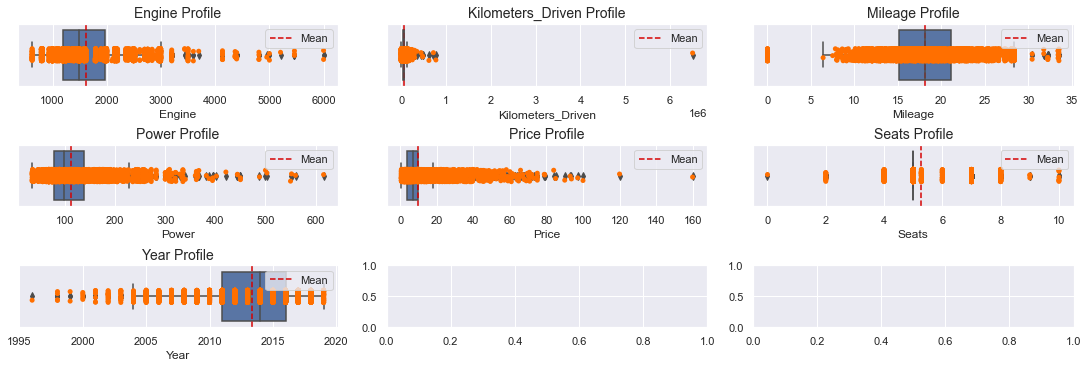

In [21]:
fig, axs = plt.subplots(
    nrows=3,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,5),                                                         # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_box_chart(ax, df_column_name):                                     # Helper function to plot the violin plot.
    ax = sns.boxplot(                                                    # Plot the violin chart
        x=df_column_name,                                                   # Set the input column name as the x-axis
        data=main_data,                                                     # Use the main data loaded on start of the notebook
        ax = ax)
    
    sns.stripplot(x=main_data[df_column_name],                              # Plot the stripplot show were most of the data in the violin lies
                  ax = ax,                                                  # Plot the violin on the given grid axis
                  color=default_color_palette[1],                           # use one the note-book'spredefined colors for the dots
                  jitter=True)                                              # Allows stripplot to visualize number of datapoints for a given x-axis 
    
    ax.axvline(main_data[df_column_name].mean(),                            # Plot the mean on the same axis as the violinplot. 
               color=default_color_palette[3],                              # Use one of the notebook's predeined colors
               label='Mean',                                                # Set the label to display on the legend
               linestyle="dashed");                                         # set the line style to have dashes.

    ax.set_xlabel(df_column_name)                                           # Set the x-axis label of the chart.                                           
    ax.set_title(df_column_name + ' Profile', fontsize=14)                  # Set the title of the chart
    ax.legend(loc='upper right')                                            # Move the legend to the upper right of the chart

column_names = ['Engine', 'Kilometers_Driven', 'Mileage', 'Power', 'Price', 'Seats', 'Year']
count = 0
for ax in axs.flat:
    if count < len(column_names):
        plot_box_chart(ax, column_names[count])
    count = count + 1

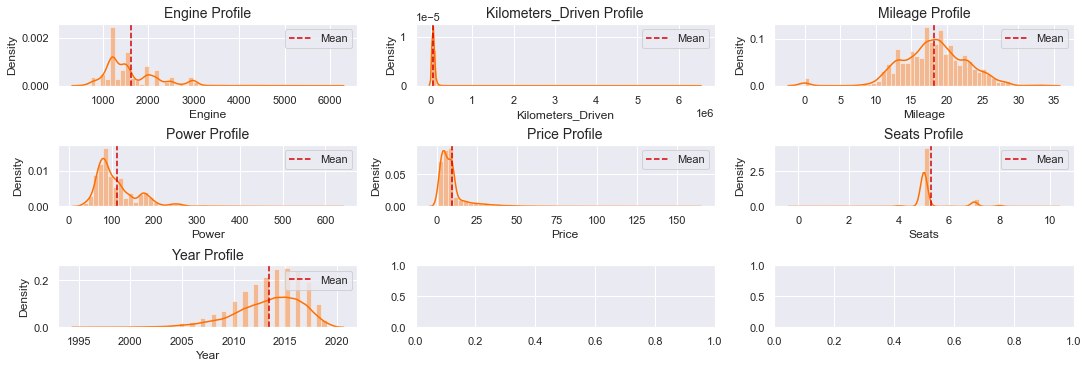

In [22]:
fig, axs = plt.subplots(
    nrows=3,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,5),                                                         # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

def plot_box_chart(ax, df_column_name):                                     # Helper function to plot the violin plot.    
    ax = sns.distplot(x=main_data[df_column_name],                          # Plot the stripplot show were most of the data in the violin lies
                  ax = ax,                                                  # Plot the violin on the given grid axis
                  color=default_color_palette[1],                           # use one the note-book'spredefined colors for the dots
                  kde=True)    
    ax.axvline(main_data[df_column_name].mean(),                            # Plot the mean on the same axis as the violinplot. 
               color=default_color_palette[3],                              # Use one of the notebook's predeined colors
               label='Mean',                                                # Set the label to display on the legend
               linestyle="dashed");                                         # set the line style to have dashes.

    ax.set_xlabel(df_column_name)                                           # Set the x-axis label of the chart.                                           
    ax.set_title(df_column_name + ' Profile', fontsize=14)                  # Set the title of the chart
    ax.legend(loc='upper right')                                            # Move the legend to the upper right of the chart

column_names = ['Engine', 'Kilometers_Driven', 'Mileage', 'Power', 'Price', 'Seats', 'Year']
count = 0
for ax in axs.flat:
    if count < len(column_names):
        plot_box_chart(ax, column_names[count])
    count = count + 1

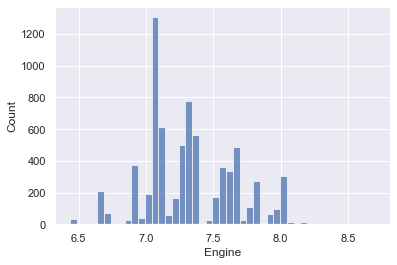

In [23]:
sns.histplot(np.log(main_data['Engine']+1))
main_data['Engine'] = main_data['Engine']+1

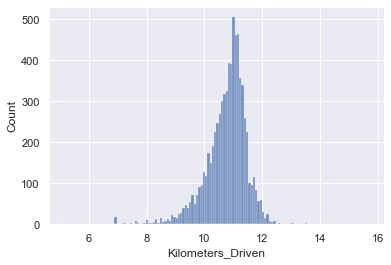

In [24]:
sns.histplot(np.log(main_data['Kilometers_Driven']+1))
main_data['Kilometers_Driven'] = np.log(main_data['Kilometers_Driven']+1)

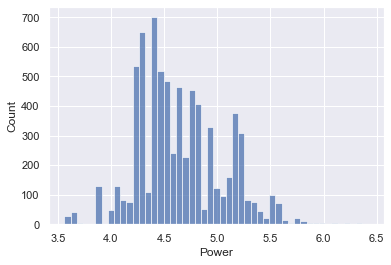

In [25]:
sns.histplot(np.log(main_data['Power']+1))
main_data['Power'] = np.log(main_data['Power']+1)

In [26]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7251 non-null   category
 1   Location           7251 non-null   category
 2   Year               7251 non-null   int64   
 3   Kilometers_Driven  7251 non-null   float64 
 4   Fuel_Type          7251 non-null   category
 5   Transmission       7251 non-null   category
 6   Owner_Type         7251 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7251 non-null   float64 
 9   Power              7251 non-null   float64 
 10  Seats              7251 non-null   float64 
 11  Price              7251 non-null   float64 
dtypes: category(5), float64(6), int64(1)
memory usage: 577.1 KB


In [27]:
main_data.dtypes[main_data.dtypes == "category"]

Name            category
Location        category
Fuel_Type       category
Transmission    category
Owner_Type      category
dtype: object

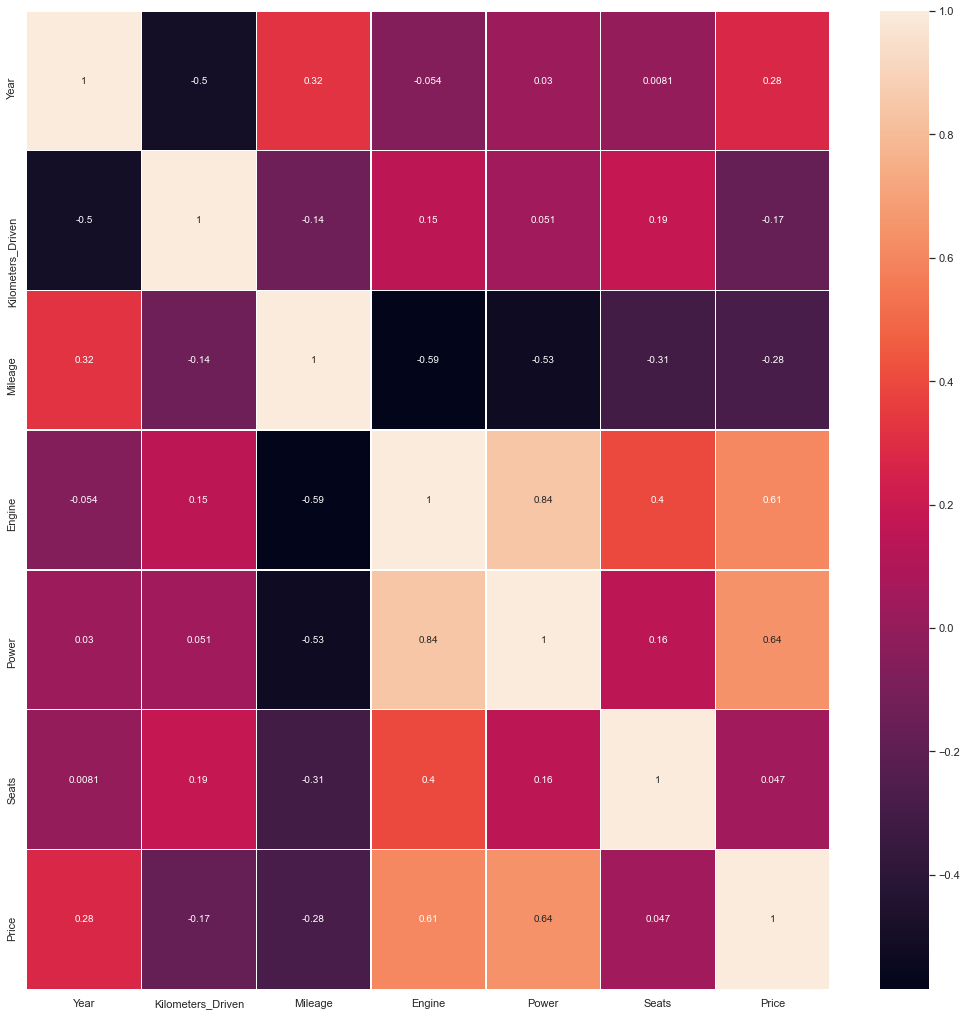

In [28]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

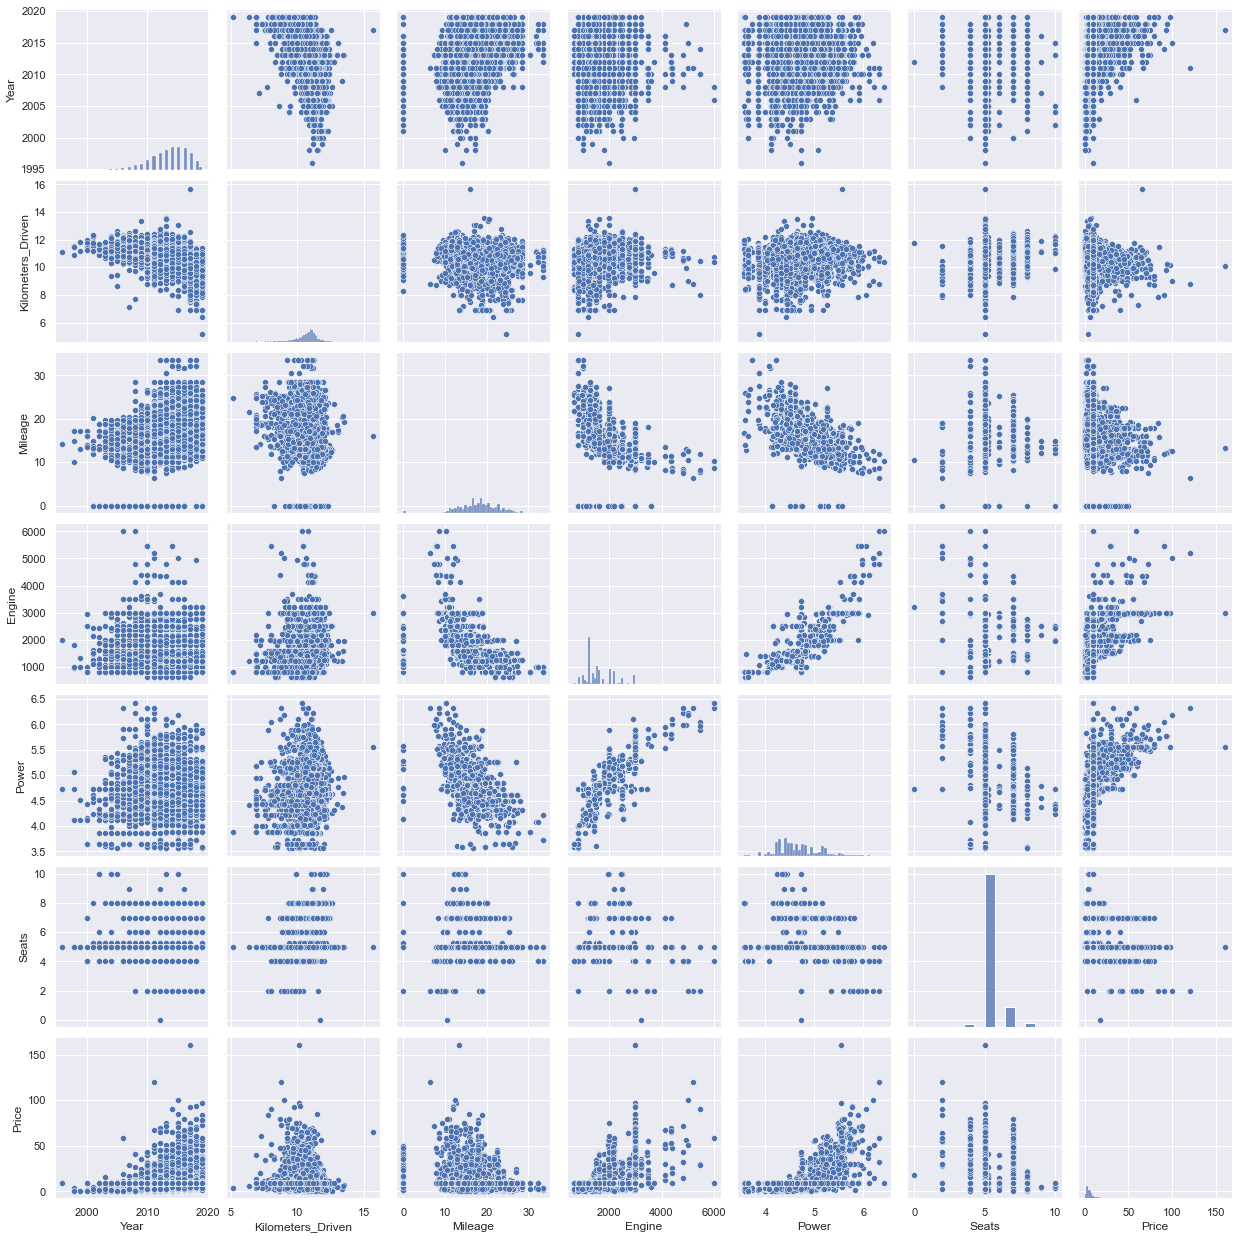

In [29]:
sns.pairplot(main_data)

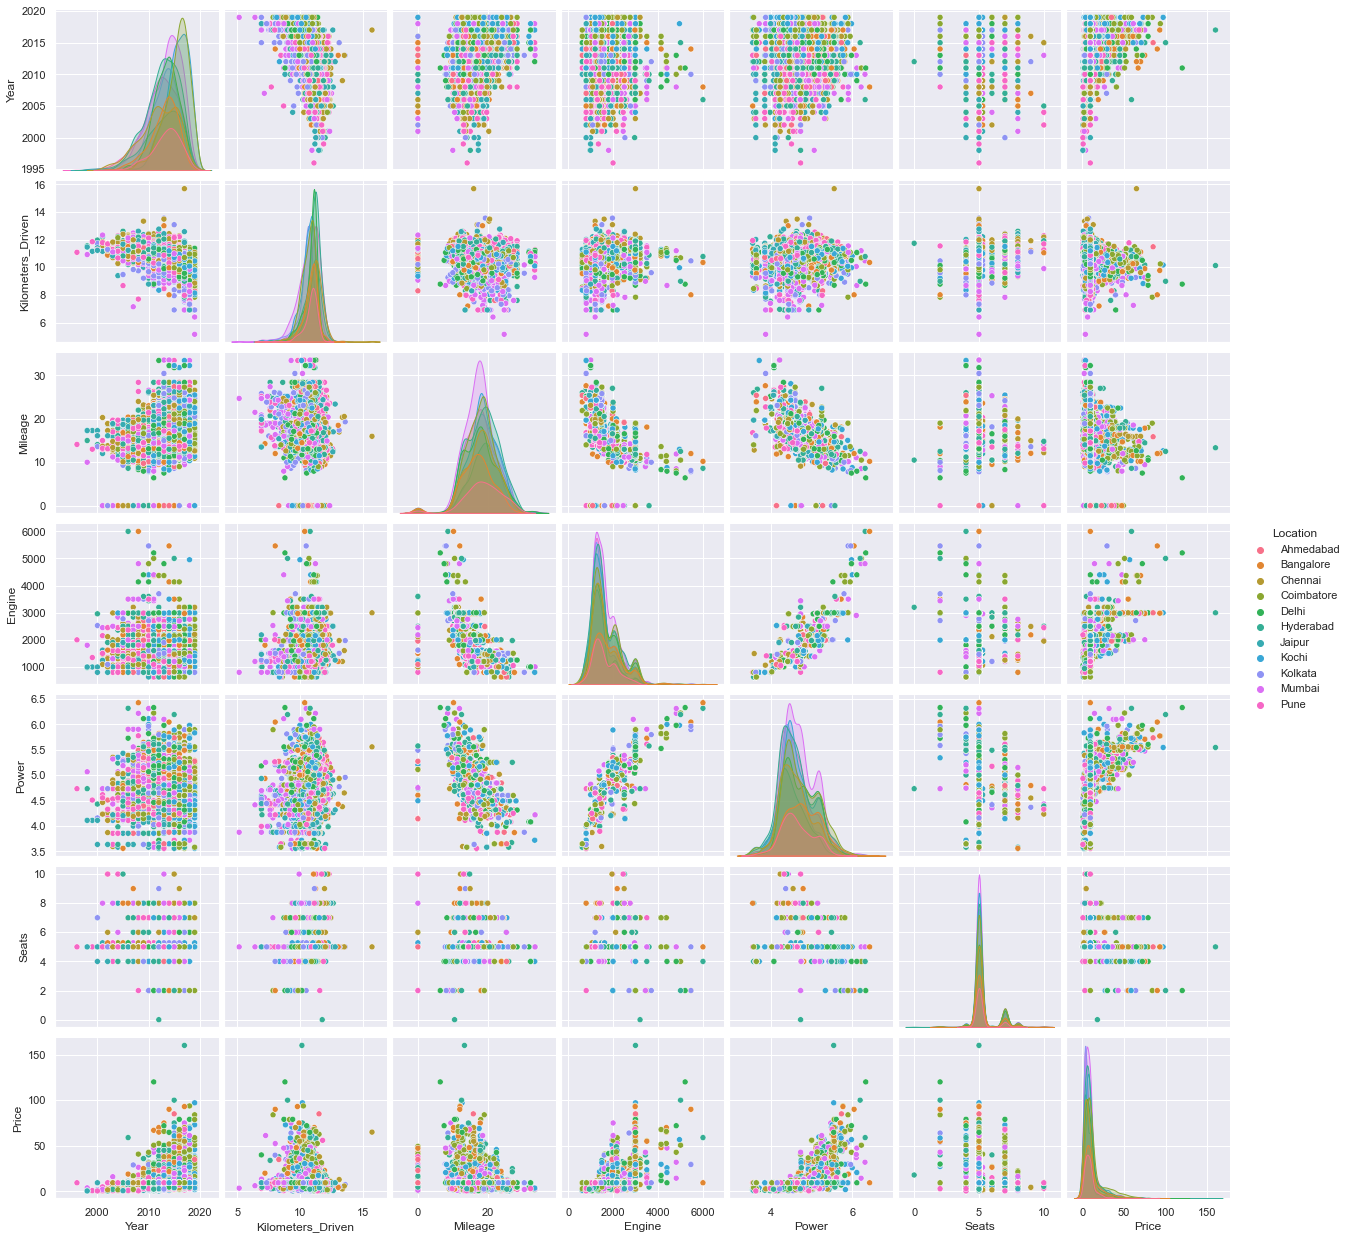

In [30]:
sns.pairplot(main_data, hue="Location");

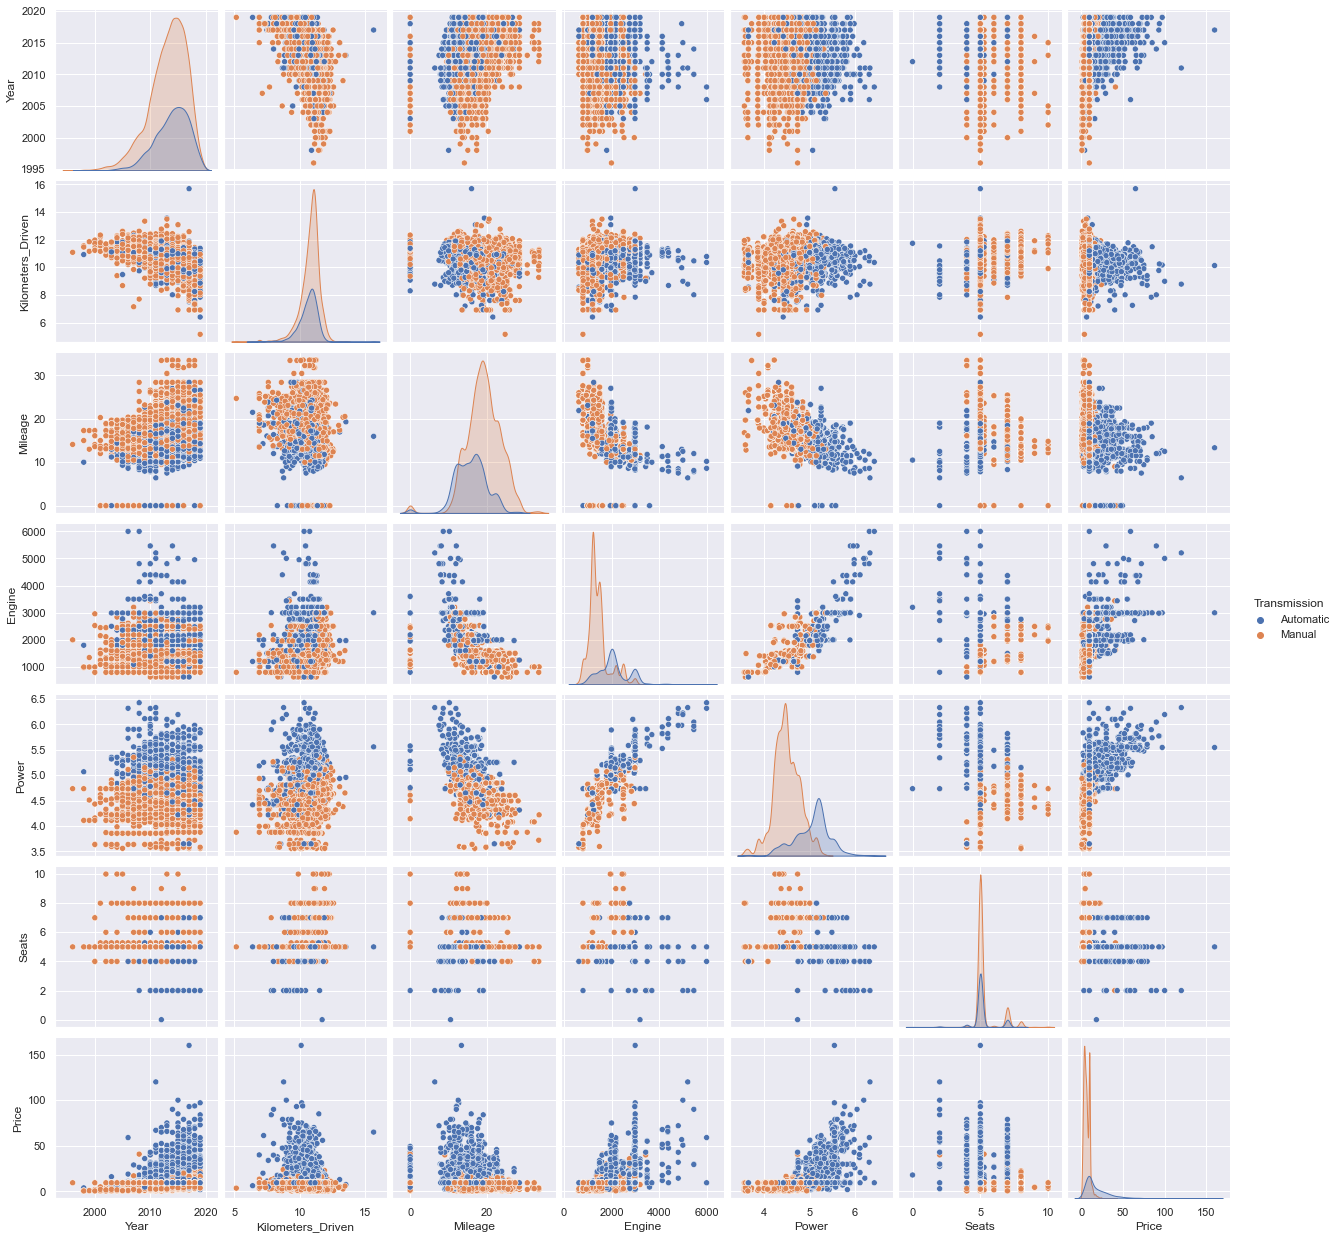

In [31]:
sns.pairplot(main_data, hue="Transmission");

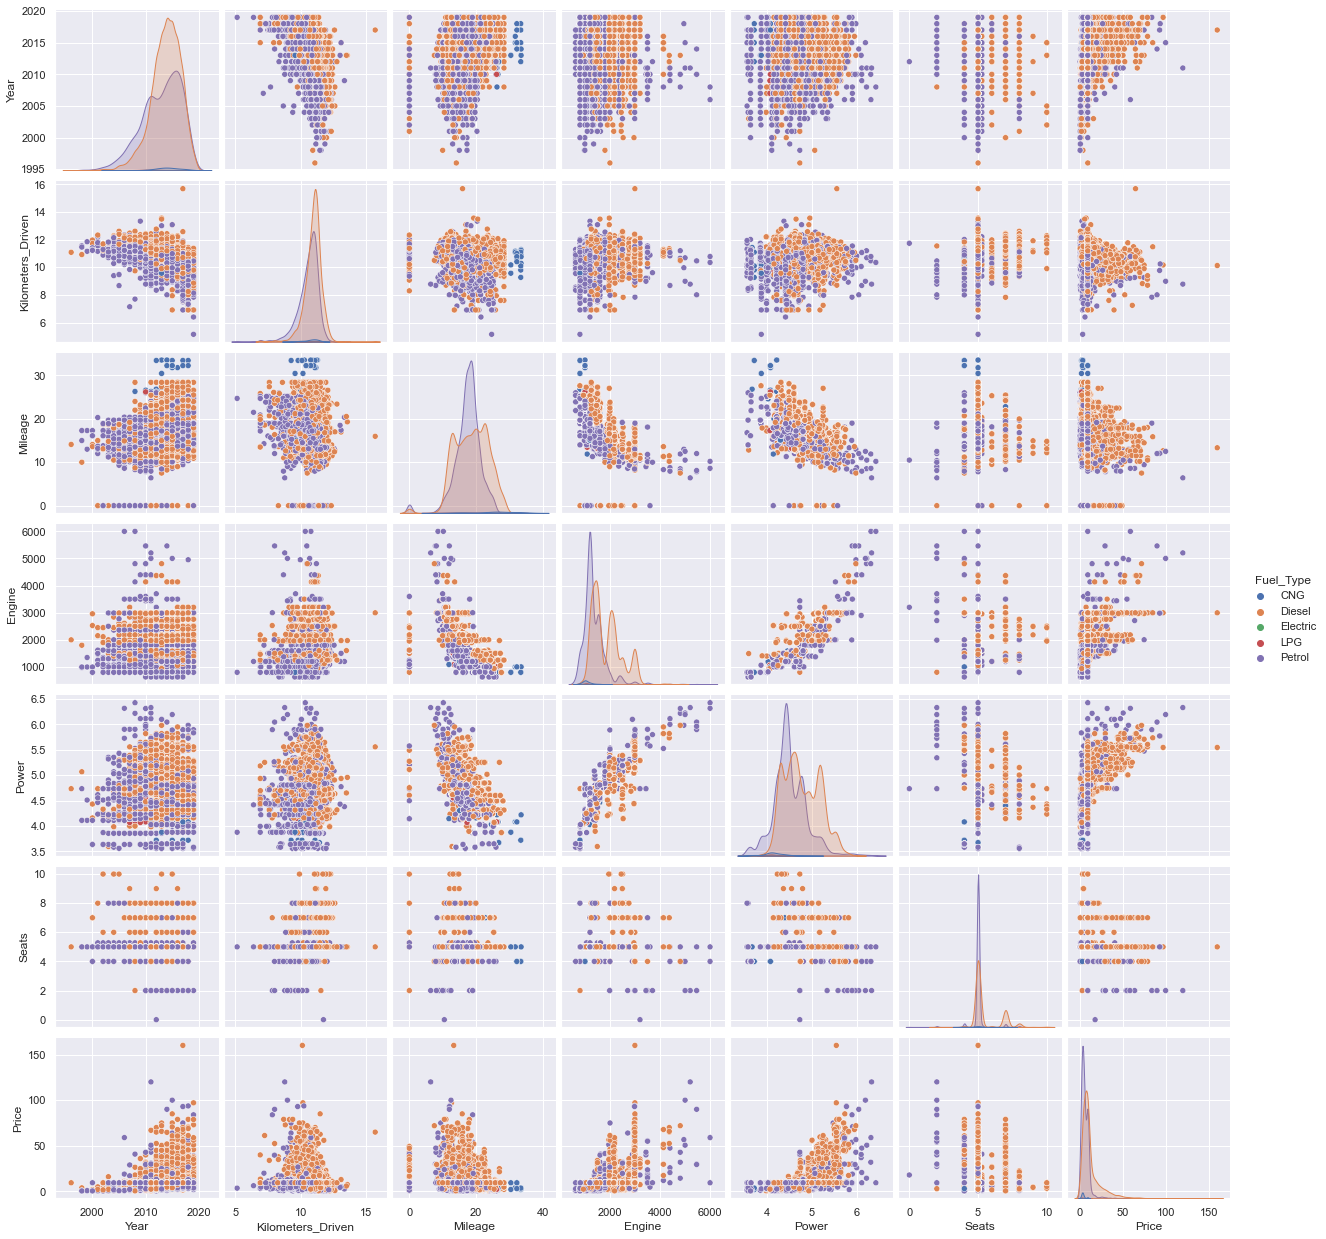

In [32]:
sns.pairplot(main_data, hue="Fuel_Type");

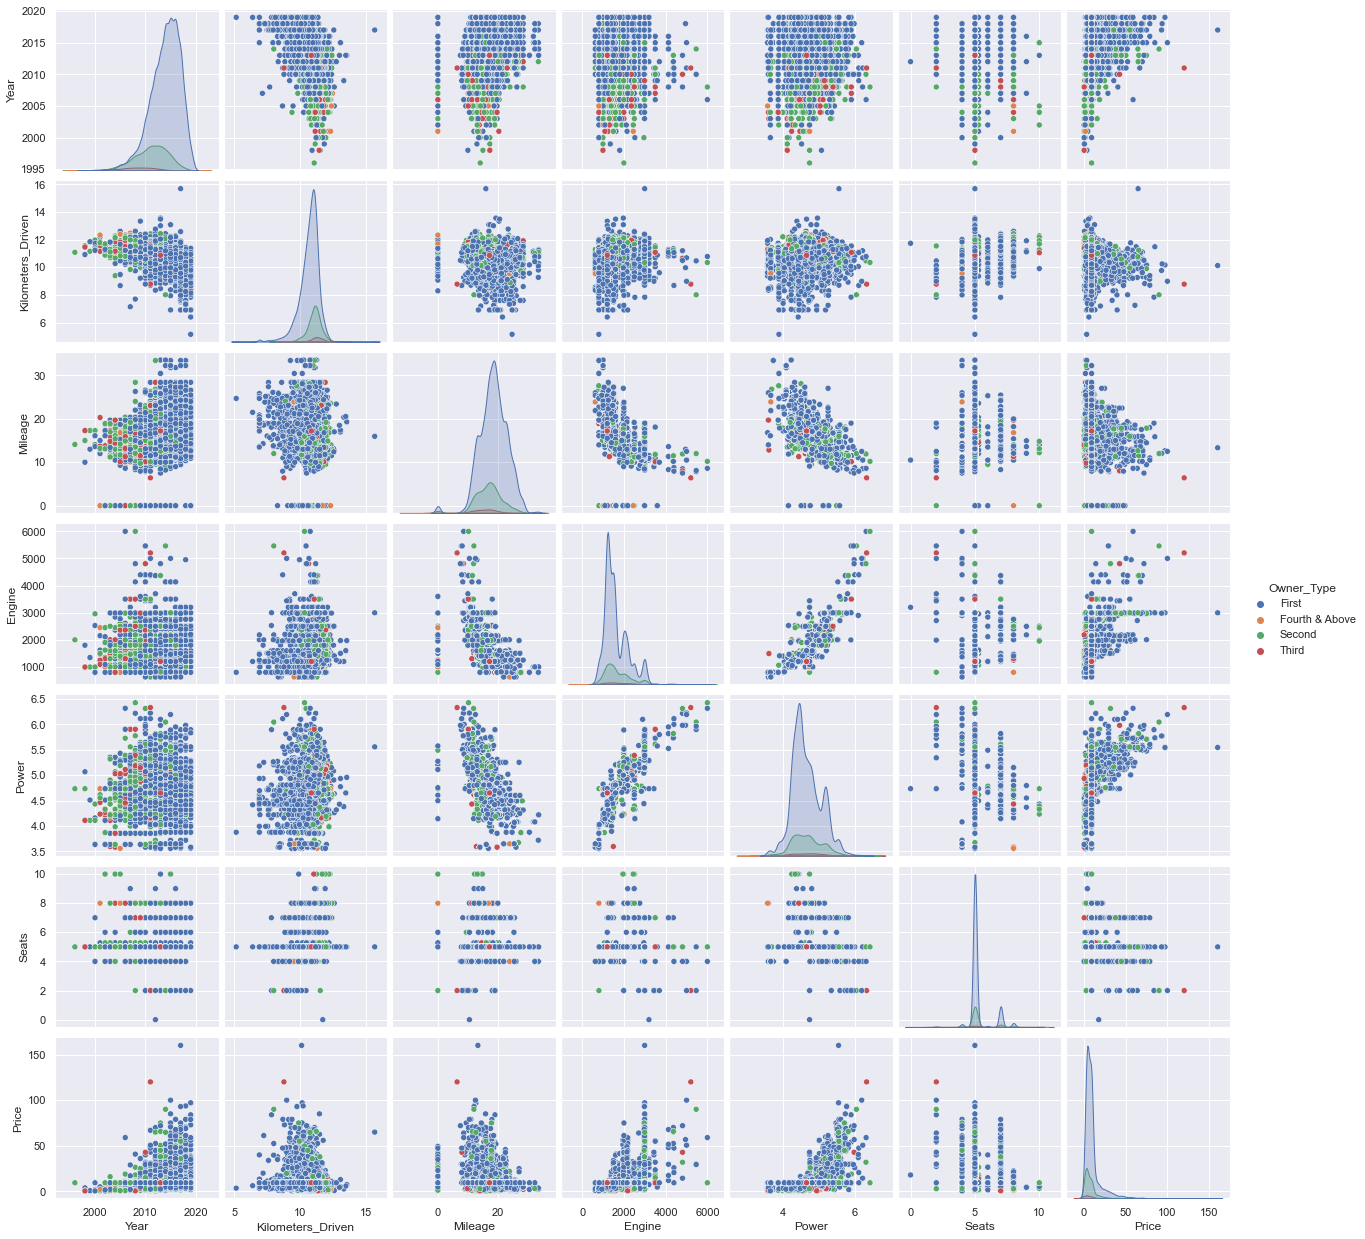

In [33]:
sns.pairplot(main_data, hue="Owner_Type");

In [34]:
cols = ['Onwer_Type', 'Fuel_Type', 'Location', 'Transmission']
for col in cols:
    main_data[col] = OneHotEncoder(sparse=False).fit_transform(main_data[[col]])

KeyError: "None of [Index(['Onwer_Type'], dtype='object')] are in the [columns]"